<a href="https://colab.research.google.com/github/cdip90/DataScienceCH/blob/main/SegundaEntrega_Dip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Análisis y predicción de pacientes diabéticos.**

En el presente trabajo se analizará los datos de una encuesta realizada por el Centro de investigaciones de enfermedades de Estados Unidos en el año 2015.

Diabetes es una efermedad crónica que afecta la capacidad de la persona de regular su nivel de azucar en sangre y que trae aparaejada severas complicaciones como enfermedades cardíacas, pérdida de visión, amputación de miembros inferiores entre otras.

Tanto un diganosticos temprano como conductas saludables permiten mitigar los efectos de esta enfermedad y mejorar sustancialmente la calidad de vida del paciente.

Parte de los datos de la encuesta refieren a comportamietos y factores de riesgo de las personas y si tienen o no algún tipo de diabetes.

A través de los mismos se intentará encontrar aquellos que mejor describan a los pacientes diabéticos y que sirvan como modelo para predecir si alguna persona puede tener esta enfermedad, lo que podría servir para tomar decisiones en políticas de salud pública de prevención.



#Objetivo#

La hipótesis planteada es que hábitos como mala alimentación, sedentarismo, tabaquismo, obesidad entre otros están relacionados con los casos de diabetes. Por lo que se intentará graficar y analizar el tipo de relación.

A su vez quiero responder a las siguientes preguntas:

¿Factores sociales como el ingreso de cada persona o nivel de educación tienen relación con los casos de diabetes?

¿Los factores de riesgo afectan de forma diferenciada a hombres y mujeres?

¿Y según el rango de edad?


## Contexto analítico##

Dentro del dataset encontramos los siguientes campos:



*   Diabetes_012: 0=sin diabetes, 1=prediabetes, 2 = diabetes
*   HighBP: Presión sanguínea alta, 0=No, 1= SI
*   HighChol: Coelsterol Ato
*   CholCheck: Control de colesterol en los últimos 5 años
*   BMI (Body Mass Index): Índice de masa corporal.
*   Smoker: Fumó por lo menos 100 cigarrillos en su vida.
*   Stroke: Sufrió un ACV
*   HeartDiseaseorAttack: Sufrió un ataque cardíaco.
*   PhysActivity: Si realizó actividad física en los últimos 30 días.
*   Fruits: Consumo de 1 o más frutas por día
*   Veggies: Consum de 1 o más vegetales por día.
*   HvyAlcoholConsump: Alto consumo de alcohol en adultos. (Hombres 14 medidas por semana, mujeres 7 por semana)
*   AnyHealthcare: Cobertura médica.
*   NoDocbcCost: No visitar a un medíco en el último año debido a su costo.
*   GenHlth: Salud general en escala de 1 a 5, siendo 1 exceleten y 5 pobre.
*   MentHlth. Salud mental que incluye estrés, depresión o problemas emocionales. Indica cuantos días de los últimos 30 considera que su salud mental se vió afectada.
*   PhysHlth. Salud física que incluye lesiones y enfermedades. Indica cuantos días de los últimos 30 considera que su salud física se vió afectada.
*   DiffWalk. Si la persona presenta dificultad al caminar o subir escaleras.
*   Sex: 0 = femenino, 1 =  masculino
*   Age: Edad dividida en una escala de 13 valores. (1: 18-24, 2: 25-29, 3: 30-34, 4: 35-39, 5: 40-44, 6: 45-49, 7: 50-56, 8: 55-59, 9: 60-64, 10: 65-69, 11: 70-74, 12: 75-79, 13: 80 años o más)
*   Education: Escala 1: sin educación, 2: priamria, 3: secundaria incompleta, 4: secundaria completa, 5: universidad incompleta o escuela técnica, 6: universidad completa.
*  Income: Ingresos anuales: 1: menor a 10000, 2: entre 10000 y 15000, 3: entre 15000 y 20000, 4: entre 20000 y 25000, 5: entre 25000 y 35000, 6: entre 35000 y 50000, 7: entre 50000 y 75000, 8: mayor a u$s 75000.





















In [ ]:
pip install ydata_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 32.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=86d80075932199c5837833e165dceace89783bb715617776faa6b9f2d40e1955
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
import pandas as pd
from google.colab import drive
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
drive.mount('/content/drive')
from math import floor
from ydata_profiling import ProfileReport

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Cargamos y visualizamos el dataset
df_encuesta = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes_012_health_indicators_BRFSS2015.csv')
df_encuesta

Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...              ...     ...       ...        ...   ...     ...     ...   
253675           0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676           2.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677           0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678           0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679           2.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                        0.0           0.0     0.0  ...            1.0   
1                        0.0           1.0     0.0  ...            0.0   
2                        0.0           0.0     1.0  ...            1.0   
3                        0.0           1.0     1.0  ...            1.0   
4                        0.0           1.0     1.0  ...            1.0   
...                      ...           ...     ...  ...            ...   
253675                   0.0           0.0     1.0  ...            1.0   
253676                   0.0           0.0     0.0  ...            1.0   
253677                   0.0           1.0     1.0  ...            1.0   
253678                   0.0           0.0     1.0  ...            1.0   
253679                   1.0           1.0     1.0  ...            1.0   

        NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  \
0               0.0      5.0      18.0      15.0       1.0  0.0   9.0   
1               1.0      3.0       0.0       0.0       0.0  0.0   7.0   
2               1.0      5.0      30.0      30.0       1.0  0.0   9.0   
3               0.0      2.0       0.0       0.0       0.0  0.0  11.0   
4               0.0      2.0       3.0       0.0       0.0  0.0  11.0   
...             ...      ...       ...       ...       ...  ...   ...   
253675          0.0      3.0       0.0       5.0       0.0  1.0   5.0   
253676          0.0      4.0       0.0       0.0       1.0  0.0  11.0   
253677          0.0      1.0       0.0       0.0       0.0  0.0   2.0   
253678          0.0      3.0       0.0       0.0       0.0  1.0   7.0   
253679          0.0      2.0       0.0       0.0       0.0  0.0   9.0   

        Education  Income  
0             4.0     3.0  
1             6.0     1.0  
2             4.0     8.0  
3             3.0     6.0  
4             5.0     4.0  
...           ...     ...  
253675        6.0     7.0  
253676        2.0     4.0  
253677        5.0     2.0  
253678        5.0     1.0  
253679        6.0     2.0  

[253680 rows x 22 columns]

In [ ]:
df_encuesta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
# Si bien con el resultado de la información del dataset observamos que no hay valores nulos, procedemos a confiirmarlo:
df_encuesta = df_encuesta.rename(str.lower, axis='columns')
df_encuesta.isnull().sum()

diabetes_012            0
highbp                  0
highchol                0
cholcheck               0
bmi                     0
smoker                  0
stroke                  0
heartdiseaseorattack    0
physactivity            0
fruits                  0
veggies                 0
hvyalcoholconsump       0
anyhealthcare           0
nodocbccost             0
genhlth                 0
menthlth                0
physhlth                0
diffwalk                0
sex                     0
age                     0
education               0
income                  0
dtype: int64

In [ ]:
# Analizamos los valores máximos y mínimos de cada columna para identificar si existen valores fuera de rango

df_encuesta.max()

diabetes_012             2.0
highbp                   1.0
highchol                 1.0
cholcheck                1.0
bmi                     98.0
smoker                   1.0
stroke                   1.0
heartdiseaseorattack     1.0
physactivity             1.0
fruits                   1.0
veggies                  1.0
hvyalcoholconsump        1.0
anyhealthcare            1.0
nodocbccost              1.0
genhlth                  5.0
menthlth                30.0
physhlth                30.0
diffwalk                 1.0
sex                      1.0
age                     13.0
education                6.0
income                   8.0
dtype: float64

In [ ]:
# De acuerdo a los resultados la única columna que podría presentar outliers es 'bmi'
df_encuesta.min()

diabetes_012             0.0
highbp                   0.0
highchol                 0.0
cholcheck                0.0
bmi                     12.0
smoker                   0.0
stroke                   0.0
heartdiseaseorattack     0.0
physactivity             0.0
fruits                   0.0
veggies                  0.0
hvyalcoholconsump        0.0
anyhealthcare            0.0
nodocbccost              0.0
genhlth                  1.0
menthlth                 0.0
physhlth                 0.0
diffwalk                 0.0
sex                      0.0
age                      1.0
education                1.0
income                   1.0
dtype: float64

# **EDA**

En los siguiente gráficos se muestra como es la distribución en cuanto a estado de diabetes y al rango de edad de las personas encuestadas

In [ ]:
color_palette = sns.husl_palette(13)

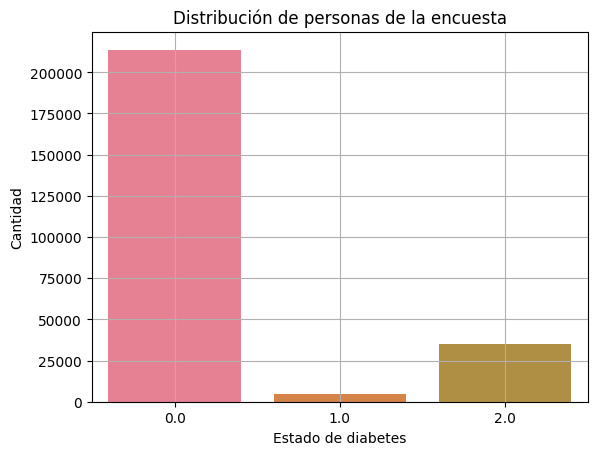

In [ ]:
#visualizamos algunas variables y relaciones
# Graficamos la cantidad de personas con disinto grado de diabetes
fig, ax = plt.subplots()

diabetes = df_encuesta.groupby('diabetes_012').count()

sns.barplot(data=diabetes, x = diabetes.index ,y= 'age',palette=color_palette).set(title="Distribución de personas de la encuesta")
ax.set_xlabel('Estado de diabetes')
ax.set_ylabel('Cantidad')
ax.grid()



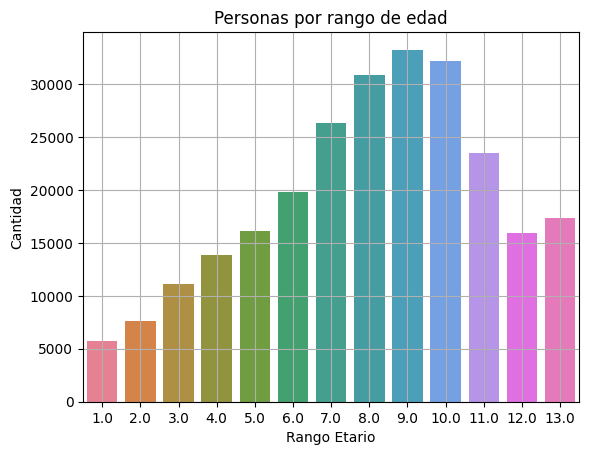

In [ ]:
#Distribución de rango etario de la encuesta

fig, ax = plt.subplots()
edad = df_encuesta.groupby('age').count()

sns.barplot(data=edad, x = edad.index ,y= 'diabetes_012',palette=color_palette).set(title='Personas por rango de edad')

ax.set_xlabel('Rango Etario')
ax.set_ylabel('Cantidad')
ax.grid()


#En esta sección se da respuesta a las preguntas planteadas

### Estado de diabetes por edad

Text(0.5, 1.0, 'Porcentaje de gente con diabetes por rango etario')

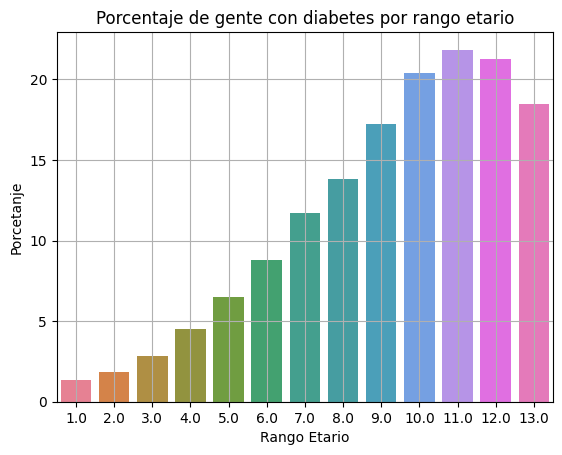

In [ ]:
#Casos de diabetes por edad.
# Como vemos, la distribuciónn por edad no es uniforme por lo que para graficar los casos, sería mejor utilizar el porcentaje de diabeticos por rango etario
fig, ax = plt.subplots()

diabetes = df_encuesta.loc[df_encuesta.diabetes_012 == 2,:]
prediabetes = df_encuesta.loc[df_encuesta.diabetes_012 == 1,:]
sin_diabetes = df_encuesta.loc[df_encuesta.diabetes_012 == 0,:]


diabetes_edad = diabetes.groupby('age').count()
diabetes_pct = (diabetes_edad/edad)*100
sns.barplot(data=diabetes_pct, x= diabetes_pct.index, y='diabetes_012',palette=color_palette)
ax.grid()
ax.set_xlabel('Rango Etario')
ax.set_ylabel('Porcetanje')
ax.set_title('Porcentaje de gente con diabetes por rango etario')

Text(0.5, 1.0, 'Porcentaje de gente con prediabetes por rango etario')

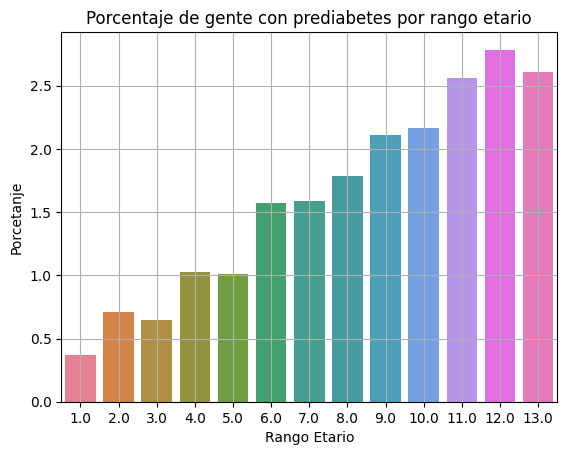

In [ ]:
fig, ax = plt.subplots()

prediabetes_edad = prediabetes.groupby('age').count()
prediabetes_pct=(prediabetes_edad/edad)*100
sns.barplot(data=prediabetes_pct, x= prediabetes_pct.index, y='diabetes_012',palette=color_palette)
ax.grid()
ax.set_xlabel('Rango Etario')
ax.set_ylabel('Porcetanje')
ax.set_title('Porcentaje de gente con prediabetes por rango etario')

Text(0.5, 1.0, 'Porcentaje de gente sin diabetes por rango etario')

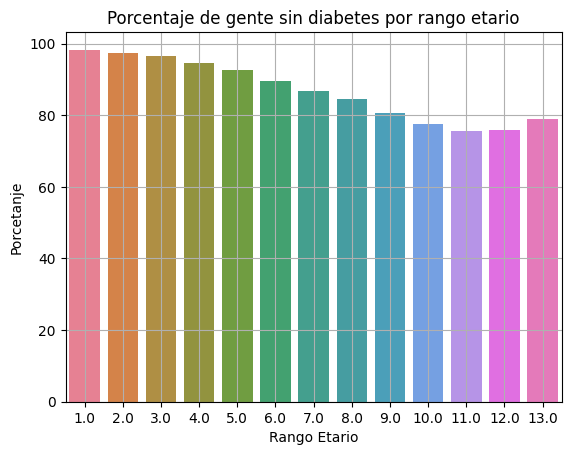

In [ ]:
fig , ax=plt.subplots()
sin_diabetes_edad = sin_diabetes.groupby('age').count()
sin_diabetes_pct=(sin_diabetes_edad/edad)*100
sns.barplot(data=sin_diabetes_pct, x= sin_diabetes_pct.index, y='diabetes_012',palette=color_palette)
ax.grid()
ax.set_xlabel('Rango Etario')
ax.set_ylabel('Porcetanje')
ax.set_title('Porcentaje de gente sin diabetes por rango etario')

De los gráficos anteriores se desprende que las personas de mayor edad son las que más sufren de diabetes, por lo que una deteccion a edad temprana podría ayudar a controlarla.

<Axes: xlabel='bmi'>

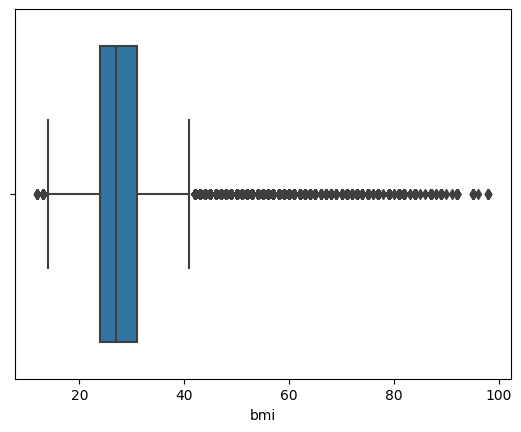

In [ ]:
# Vemos la distribución de de los valores de BMI

sns.boxplot(data=df_encuesta, x='bmi')


In [ ]:
fq = df_encuesta["bmi"].quantile(0.25)
tq = df_encuesta["bmi"].quantile(0.75)
iqr= tq-fq
max_inlier=tq + (1.5*iqr)
min_inlier = fq - (1.5*iqr)
df_encuesta["bmi"].mean()

28.382363607694735

In [ ]:
# Se observa valores dentro del rango esperable de BMI (en general en las grillas de BMI contemplan hasta el valor 40/45 que ya es dentro del rango de obesidad extrema)
# Podemos asumir que valores de bmi mayores al máximo inlier son debido a algún error y por lo tanto podemos reemplazarlo por ese valor para no afectar la varianza de esto a futuro por si necesitamos esta variable.
# No podemos afirmar lo mismo para valores debajo del minimo inlier

for value in df_encuesta.index:
  if df_encuesta.loc[value,"bmi"] > max_inlier:
    df_encuesta.loc[value,"bmi"] = floor(max_inlier)

df_encuesta["bmi"].mean()


28.08781535793125

### Diabetes en relación al indice de masa corporal

Text(0.5, 0.98, 'BMI por rango de edad y salud')

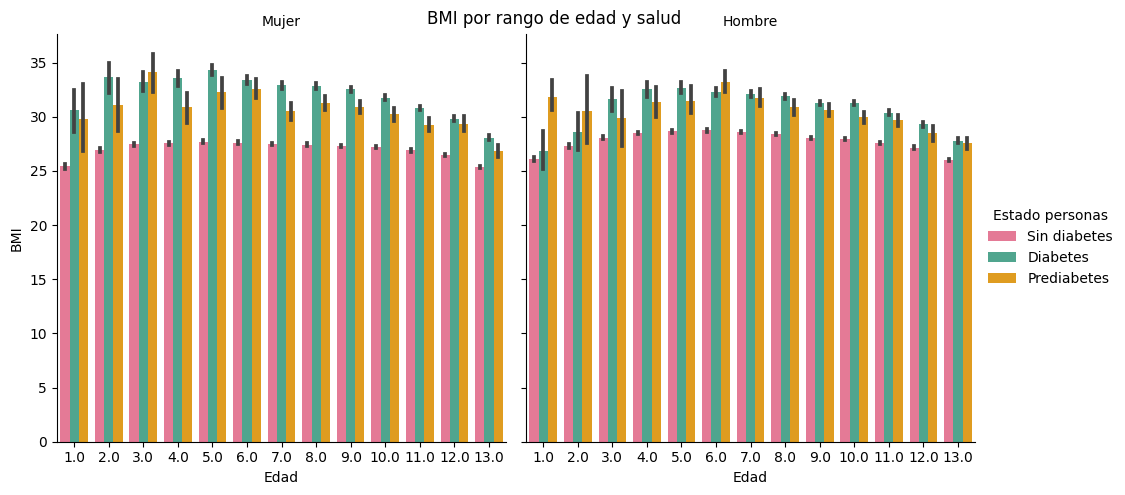

In [ ]:
# BMI promedio por edad diferenciado según estado de diabetes y dividido según el sexo

df_bmi = df_encuesta
df_bmi['sex']=df_bmi['sex'].replace({0:'Mujer',1:'Hombre'})
df_bmi['diabetes_012']=df_bmi['diabetes_012'].replace({0:'Sin diabetes',1:'Prediabetes',2:'Diabetes'})
df_bmi =df_bmi.rename(columns={'diabetes_012':'Estado personas'})
f = sns.catplot(data = df_bmi, x='age', y='bmi', hue='Estado personas', col= 'sex', kind='bar', col_wrap=2,palette={'Sin diabetes': '#f6688e', 'Prediabetes': 'orange', 'Diabetes': '#42b395'})
f.set_titles(col_template='{col_name}')
f.set_axis_labels('Edad', 'BMI')
f.fig.suptitle('BMI por rango de edad y salud')


In [ ]:
df_bmi_h =df_bmi.loc[df_bmi.sex=='Hombre',:]
df_bmi_m =df_bmi.loc[df_bmi.sex=='Mujer',:]

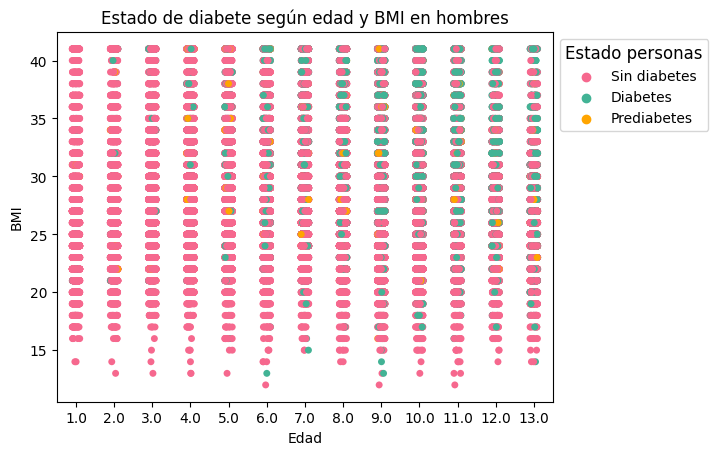

In [ ]:
fig , ax=plt.subplots()
sns.stripplot(data=df_bmi_h, x='age', y='bmi', hue='Estado personas',palette={'Sin diabetes': '#f6688e', 'Prediabetes': 'orange', 'Diabetes': '#42b395'})
ax.set_xlabel('Edad')
ax.set_ylabel('BMI')
plt.title('Estado de diabete según edad y BMI en hombres')
plt.legend(title='Estado personas', title_fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

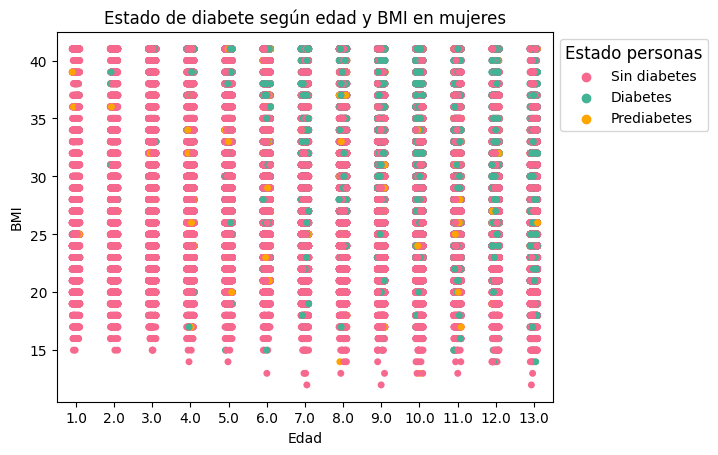

In [ ]:
fig , ax=plt.subplots()
sns.stripplot(data=df_bmi_m, x='age', y='bmi', hue='Estado personas',palette={'Sin diabetes': '#f6688e', 'Prediabetes': 'orange', 'Diabetes': '#42b395'})
ax.set_xlabel('Edad')
ax.set_ylabel('BMI')
plt.title('Estado de diabete según edad y BMI en mujeres')
plt.legend(title='Estado personas', title_fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

Aqui se observa la influencia de un indice de masa corporal elevado en personas diabéticas.
Como dato significativo notamos que en las mujeres la brecha de BMI se acentúa más que en los hombres. Esto se hace más visible en en gráfico de dispersión de mujeres ya que se observa mayor recurrencia de prediabetes/diabetes en personas en edades media con un BMI alto.
Esto podría llevar a tomar distintas medidas según el sexo del paciente.

### ¿Cómo afectan los factores sociales en el desarrollo de diabetes?

Text(0.5, 1.0, 'Porcentaje de personas diabéticas por rango de ingresos')

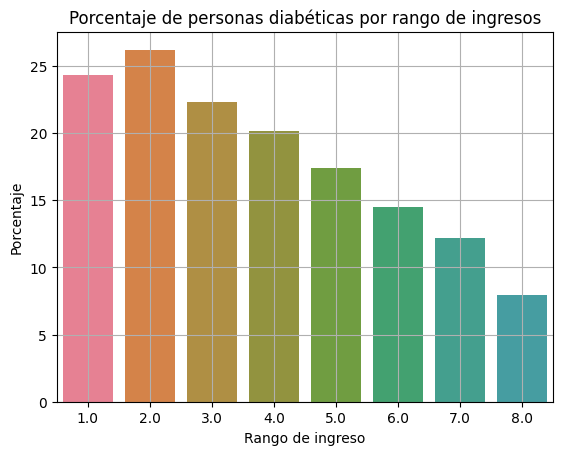

In [ ]:
#Analisis de diabeticos por rango de ingresos
fig, ax = plt.subplots()

ingreso = df_encuesta.groupby('income').count()
diabetes_ingreso = diabetes.groupby('income').count()
diabetes_ingreso_pct = (diabetes_ingreso/ingreso)*100
sns.barplot(data=diabetes_ingreso_pct, x=diabetes_ingreso_pct.index, y ='age',palette=color_palette)
ax.grid()
ax.set_xlabel('Rango de ingreso')
ax.set_ylabel('Porcentaje')
ax.set_title('Porcentaje de personas diabéticas por rango de ingresos')

Text(0.5, 1.0, 'Porcentaje de personas prediabéticas por rango de ingresos')

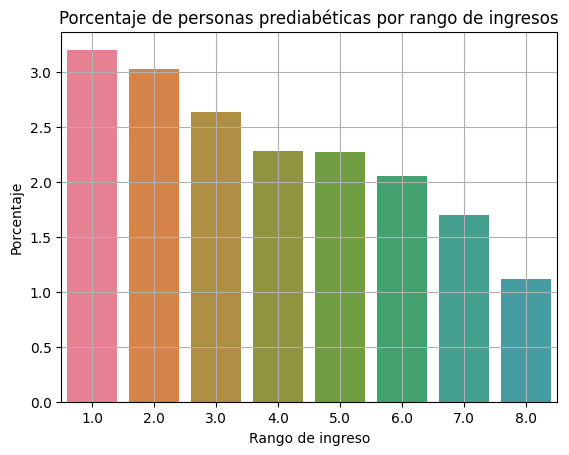

In [ ]:
#Analisis de prediabeticos por rango de ingresos
fig, ax = plt.subplots()


prediabetes_ingreso = prediabetes.groupby('income').count()
prediabetes_ingreso_pct = (prediabetes_ingreso/ingreso)*100
sns.barplot(data=prediabetes_ingreso_pct, x=prediabetes_ingreso_pct.index, y ='age',palette=color_palette)
ax.grid()
ax.set_xlabel('Rango de ingreso')
ax.set_ylabel('Porcentaje')
ax.set_title('Porcentaje de personas prediabéticas por rango de ingresos')

Text(0.5, 1.0, 'Porcentaje de personas diabéticas por nivel de educación')

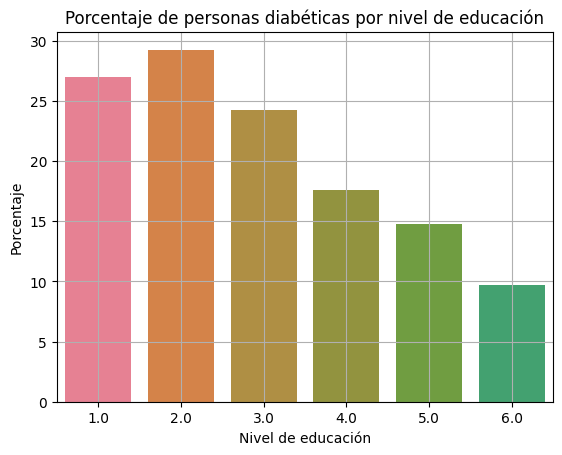

In [ ]:
#Analisis de diabeticos por nivel de educación
fig, ax = plt.subplots()

educacion = df_encuesta.groupby('education').count()
diabetes_educacion = diabetes.groupby('education').count()
diabetes_educacion_pct = (diabetes_educacion/educacion)*100
sns.barplot(data=diabetes_educacion_pct, x=diabetes_educacion_pct.index, y ='age',palette=color_palette)
ax.grid()
ax.set_xlabel('Nivel de educación')
ax.set_ylabel('Porcentaje')
ax.set_title('Porcentaje de personas diabéticas por nivel de educación')

De los análisis gráficos se obtiene que tanto el nivel de ingreso como de educación influyen en el desarrollo de diabetes.
A partir de esto se podría plantear el desarrollo de políticas de prevención dedicados a los grupos más vulnerables.

In [ ]:
# Procedo a analizar si hay variables muy correlacionadas como para poder eliminar alguna y reducir la dimensió del data set
df_encuesta.corr()

<ipython-input-24-b5c752e672de>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_encuesta.corr()


highbp  highchol  cholcheck       bmi    smoker  \
highbp                1.000000  0.298199   0.098508  0.238120  0.096991   
highchol              0.298199  1.000000   0.085642  0.124148  0.091299   
cholcheck             0.098508  0.085642   1.000000  0.038648 -0.009929   
bmi                   0.238120  0.124148   0.038648  1.000000  0.018688   
smoker                0.096991  0.091299  -0.009929  0.018688  1.000000   
stroke                0.129575  0.092620   0.024158  0.022077  0.061173   
heartdiseaseorattack  0.209361  0.180765   0.044206  0.060350  0.114441   
physactivity         -0.125267 -0.078046   0.004190 -0.152509 -0.087401   
fruits               -0.040555 -0.040859   0.023849 -0.094120 -0.077666   
veggies              -0.061266 -0.039874   0.006121 -0.067386 -0.030678   
hvyalcoholconsump    -0.003972 -0.011543  -0.023730 -0.052537  0.101619   
anyhealthcare         0.038425  0.042230   0.117626 -0.015999 -0.023251   
nodocbccost           0.017358  0.013310  -0.058255  0.058855  0.048946   
genhlth               0.300530  0.208426   0.046589  0.253757  0.163143   
menthlth              0.056456  0.062069  -0.008366  0.082770  0.092196   
physhlth              0.161212  0.121751   0.031775  0.118655  0.116460   
diffwalk              0.223618  0.144672   0.040585  0.198084  0.122463   
age                   0.344452  0.272318   0.090321 -0.026541  0.120641   
education            -0.141358 -0.070802   0.001510 -0.114017 -0.161955   
income               -0.171235 -0.085459   0.014259 -0.098250 -0.123937   

                        stroke  heartdiseaseorattack  physactivity    fruits  \
highbp                0.129575              0.209361     -0.125267 -0.040555   
highchol              0.092620              0.180765     -0.078046 -0.040859   
cholcheck             0.024158              0.044206      0.004190  0.023849   
bmi                   0.022077              0.060350     -0.152509 -0.094120   
smoker                0.061173              0.114441     -0.087401 -0.077666   
stroke                1.000000              0.203002     -0.069151 -0.013389   
heartdiseaseorattack  0.203002              1.000000     -0.087299 -0.019790   
physactivity         -0.069151             -0.087299      1.000000  0.142756   
fruits               -0.013389             -0.019790      0.142756  1.000000   
veggies              -0.041124             -0.039167      0.153150  0.254342   
hvyalcoholconsump    -0.016950             -0.028991      0.012392 -0.035288   
anyhealthcare         0.008776              0.018734      0.035505  0.031544   
nodocbccost           0.034804              0.031000     -0.061638 -0.044243   
genhlth               0.177942              0.258383     -0.266186 -0.103854   
menthlth              0.070172              0.064621     -0.125587 -0.068217   
physhlth              0.148944              0.181698     -0.219230 -0.044633   
diffwalk              0.176567              0.212709     -0.253174 -0.048352   
age                   0.126974              0.221618     -0.092511  0.064547   
education            -0.076009             -0.099600      0.199658  0.110187   
income               -0.128599             -0.141011      0.198539  0.079929   

                       veggies  hvyalcoholconsump  anyhealthcare  nodocbccost  \
highbp               -0.061266          -0.003972       0.038425     0.017358   
highchol             -0.039874          -0.011543       0.042230     0.013310   
cholcheck             0.006121          -0.023730       0.117626    -0.058255   
bmi                  -0.067386          -0.052537      -0.015999     0.058855   
smoker               -0.030678           0.101619      -0.023251     0.048946   
stroke               -0.041124          -0.016950       0.008776     0.034804   
heartdiseaseorattack -0.039167          -0.028991       0.018734     0.031000   
physactivity          0.153150           0.012392       0.035505    -0.061638   
fruits                0.254342        

In [ ]:
# Realizando perfilamiento del dataset
ProfileReport(df_encuesta, title="Profiling Report")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

##Insights##

De los gráficos anteriores podemos ir sacando conclusiones:

* Un indice de masa corporal alto (dentro del rango de obesidad) está asociado a personas diabéticas o prédiabeticas independientemente de la edad. No se observa diferencias significativas en el BMI promedio en hombres con diabetes o prediabetes.

*  Hay mayor porcentaje de diabéticos en rangos etarios altos.

* A mayor ingreso menor es el porcentaje de personas diabéticas.

* A mayor nivel de educación menor es el porcentaje de personans diabéticas.






